# Supervised

In [21]:
import pandas as pd

df = pd.read_csv('temp/olist_orders_dataset_df.csv')

In [22]:
df.columns

Index(['anomaly', 'time_estimate_delivery', 'year', 'month', 'day', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'customer_geolocation_lat',
       'customer_geolocation_lng', 'distance'],
      dtype='object')

In [23]:
X = df.drop(['anomaly'], axis=1)
y = df['anomaly']

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.utils import resample, shuffle

df_train = pd.concat([X_train, y_train], axis=1)
df_train_True = df_train[df_train.anomaly]
df_train_False = df_train[df_train.anomaly==False]

df_train_False = resample(df_train_False, replace=True, n_samples=df_train_True.shape[0])

df_train_balanced = shuffle(pd.concat([df_train_True, df_train_False]))
X_train = df_train_balanced.drop(['anomaly'], axis=1)
y_train = df_train_balanced['anomaly']

### Create a Table of performance

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall'])

def add_performance(algorithm, y_test, y_predict):
    global table_of_performance

    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

    table_of_performance.loc[len(table_of_performance)] = new_row

### XGBoost

In [25]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

add_performance('XGBoost', y_test, y_predict)

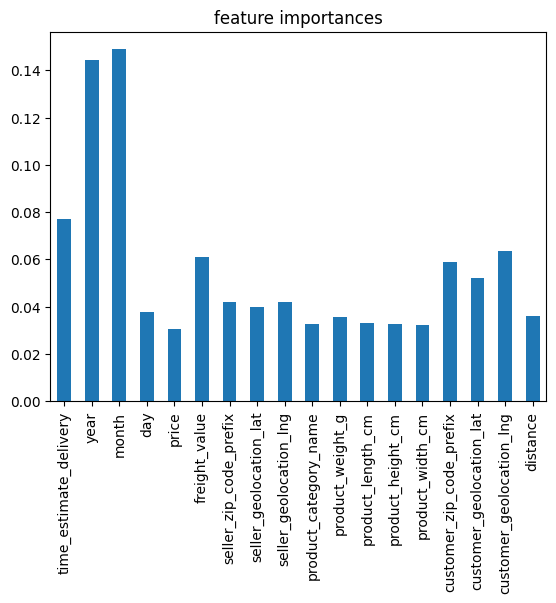

In [26]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

add_performance('logistic regression', y_test, y_predict)

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


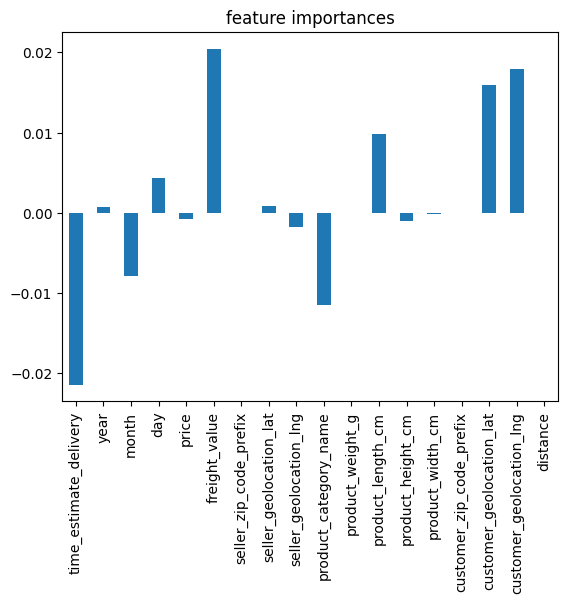

In [28]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

add_performance('random forest', y_test, y_predict)

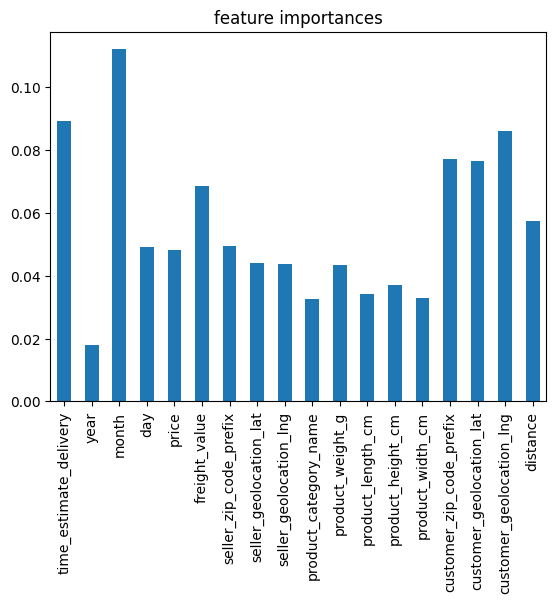

In [30]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Gradient-boosted trees

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_predict = GBC.predict(X_test)

add_performance('gradient-boosted trees', y_test, y_predict)

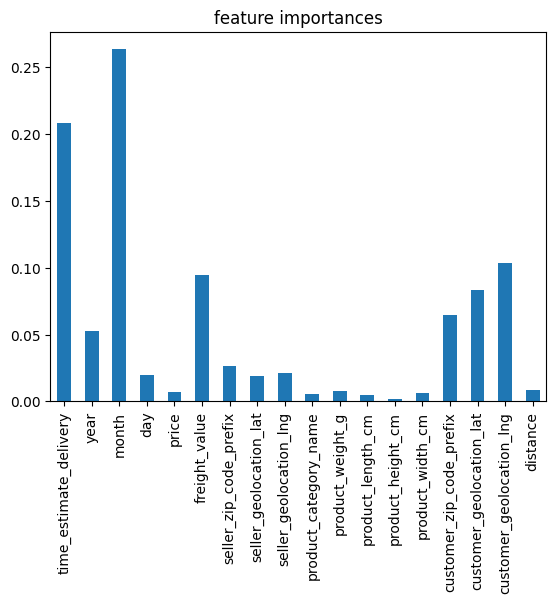

In [32]:
feature_importances = pd.Series(GBC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

add_performance('decision trees', y_test, y_predict)

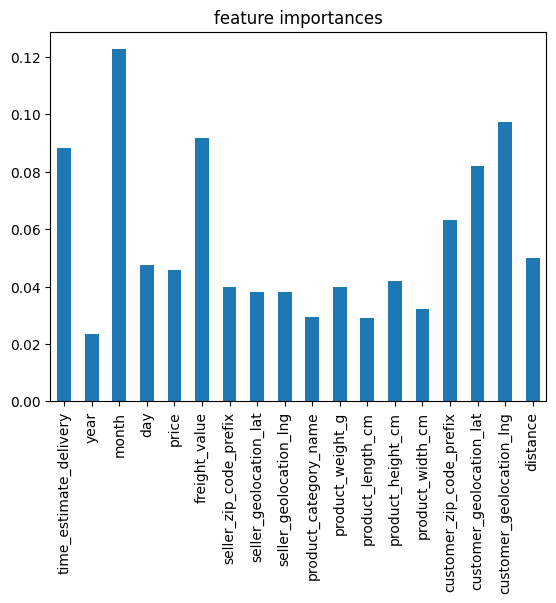

In [34]:
feature_importances = pd.Series(DTC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict = GNB.predict(X_test)

add_performance('naive bayes', y_test, y_predict)

### Support Vector Machines

In [36]:
from sklearn.svm import SVC

SV = SVC()
SV.fit(X_train, y_train)
y_predict = SV.predict(X_test)

add_performance('support vector machine', y_test, y_predict)

### Performance

In [37]:
table_of_performance.to_csv('temp/olist_orders_dataset_supervised_performance.csv', index=False)

### Testing combinations of features

In [38]:
columns1 = ['time_estimate_delivery', 'year', 'month', 'day', 'freight_value', 'seller_zip_code_prefix', 'seller_geolocation_lat', 'seller_geolocation_lng','customer_zip_code_prefix', 'customer_geolocation_lat', 'customer_geolocation_lng', 'distance']

In [39]:
X1_train = X_train[columns1]
X1_test = X_test[columns1]

confusion matrix: [[22164  6926]
 [  356  1238]]
accuracy: 0.7626776169990874
precision: 0.15164135227829495
recall: 0.7766624843161857


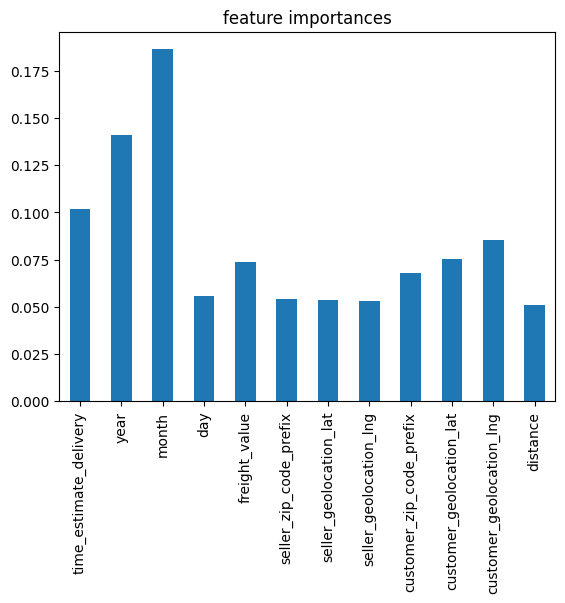

In [40]:
XGB = XGBClassifier()
XGB.fit(X1_train, y_train)
y_predict = XGB.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(XGB.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[18716 10374]
 [  598   996]]
accuracy: 0.642419502020597
precision: 0.08759894459102903
recall: 0.6248431618569636


/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


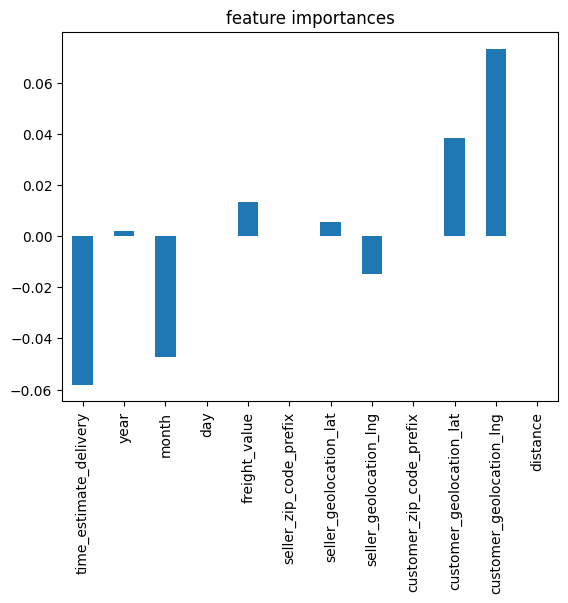

In [41]:
LR = LogisticRegression()
LR.fit(X1_train, y_train)
y_predict = LR.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(LR.coef_[0], index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

confusion matrix: [[23021  6069]
 [  379  1215]]
accuracy: 0.7898579064007301
precision: 0.16680395387149918
recall: 0.7622333751568381


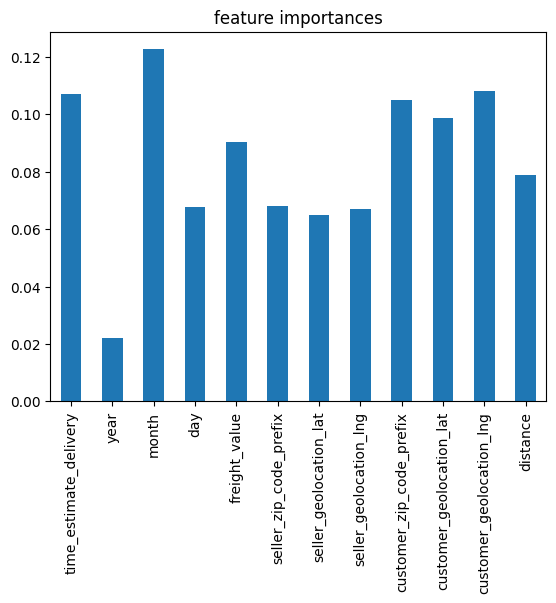

In [42]:
RF = RandomForestClassifier()
RF.fit(X1_train, y_train)
y_predict = RF.predict(X1_test)

print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', accuracy_score(y_test, y_predict))
print('precision:', precision_score(y_test, y_predict))
print('recall:', recall_score(y_test, y_predict))

feature_importances = pd.Series(RF.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

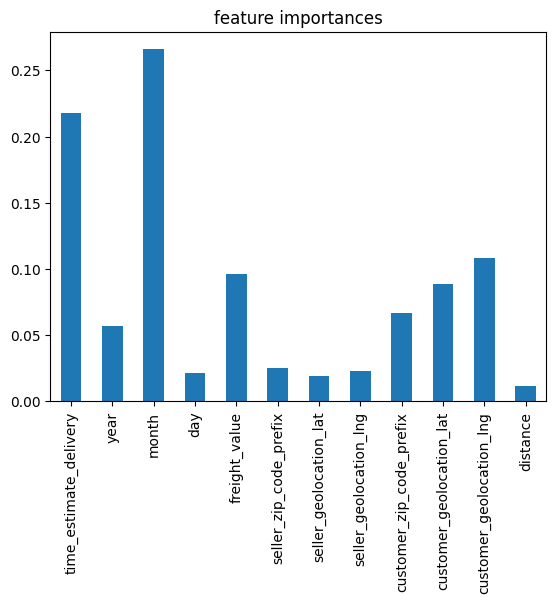

In [43]:
GBC = GradientBoostingClassifier()
GBC.fit(X1_train, y_train)
y_predict = GBC.predict(X1_test)

feature_importances = pd.Series(GBC.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

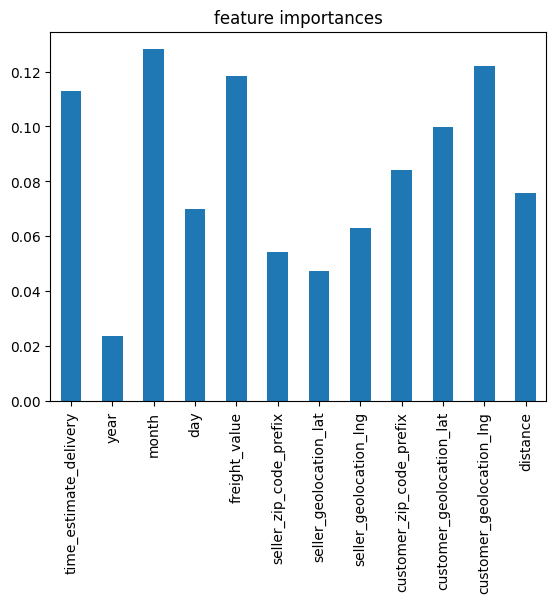

In [45]:
DTC = DecisionTreeClassifier()
DTC.fit(X1_train, y_train)
y_predict = DTC.predict(X1_test)

feature_importances = pd.Series(DTC.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

By analyzing feature importances and trying, I find the features which are important

• time_estimate_delivery
• distance
• freight_value

• year
• month
• day

• seller_zip_code_prefix
• seller_geolocation_lat
• seller_geolocation_lng
• customer_zip_code_prefix
• customer_geolocation_lat
• customer_geolocation_lng

The low precision value is because the test dataset is imbalanced while the train dataset is balanced by me. However, if not using balanced dataset, the recall rate is low. I think recall is more important than precision.